In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw10.ipynb")

# Homework 10:  Simple Linear Regression 

**Assigned Readings On These Topics from Class Schedule**: 

* [Using Confidence Intervals](https://inferentialthinking.com/chapters/13/4/Using_Confidence_Intervals.html)
* [The Regression Line](https://inferentialthinking.com/chapters/15/2/Regression_Line.html#the-regression-line-in-standard-units)
* [Inference for Regression](https://www.inferentialthinking.com/chapters/16/Inference_for_Regression.html)

* [Transformations](https://learningds.org/ch/11/viz_scale.html)

* [Transformations to fit Linear Models](https://ds100.org/course-notes/constant_model_loss_transformations/loss_transformations.html#transformations-to-fit-linear-models)



## Due Date: Thursday Apr 11th by 11:59 PM MT on Gradescope


## Collaboration Policy

Data science is a collaborative activity.  However a key step in learning and retention is **creating solutions on your own.**  

Below are examples of acceptable vs unacceptable use of resources and collaboration when doing HW assignments in CSCI 3022.


The following would be some **examples of cheating** when working on HW assignments in CSCI 3022.  Any of these constitute a **violation of the course's collaboration policy and will result in an F in the course and a trip to the honor council**.   


 - Consulting web pages that may have a solution to a given homework problem or one similar is cheating.  However, consulting the class notes, and web pages that explain the material taught in class but do NOT show a solution to the homework problem in question are permissible to view.  Clearly, there's a fuzzy line here between a valid use of resources and cheating. To avoid this line, one should merely consult the course notes, the course textbook, and references that contain syntax and/or formulas.
 - Copying a segment of code or math solution of three lines or more from another student from a printout, handwritten copy, or by looking at their computer screen 
 - Allowing another student to copy a segment of your code or math solution of three lines or more
 - Taking a copy of another student's work (or a solution found online) and then editing that copy
 - Reading someone else’s solution to a problem on the HW before writing your own.
 - Asking someone to write all or part of a program or solution for you.
 - Asking someone else for the code necessary to fix the error for you, other than for simple syntactical errors
 


On the other hand, the following are some **examples of things which would NOT usually be
considered to be cheating**:
 - Working on a HW problem on your own first and then discussing with a classmate a particular part in the problem solution where you are stuck.  After clarifying any questions you should then continue to write your solution independently.
 - Asking someone (or searching online) how a particular construct in the language works.
 - Asking someone (or searching online) how to formulate a particular construct in the language.
 - Asking someone for help in finding an error in your program.  
 - Asking someone why a particular construct does not work as you expected in a given program.
   

To test whether you are truly doing your own work and retaining what you've learned you should be able to easily reproduce from scratch and explain a HW solution that was your own when asked in office hours by a TA/Instructor or on a quiz/exam.   


If you have difficulty in formulating the general solution to a problem on your own, or
you have difficulty in translating that general solution into a program, it is advisable to see
your instructor or teaching assistant rather than another student as this situation can easily
lead to a, possibly inadvertent, cheating situation.

We are here to help!  Visit HW Hours and/or post questions on Piazza!


If while completing this assignment you reference any websites other than those linked in this assignment or provided on Canvas please list those references here:

**External references**:  *list any websites you referenced

#### Grading
Grading is broken down into autograded answers and manually graded answers. 

For autograded answers, the results of your code are compared to provided and/or hidden tests.

For manually graded answers you must show and explain all steps.  Graders will evaluate how well you answered the question and/or fulfilled the requirements of the question.


### Score breakdown



Question | Points | Grading Type
--- | --- | ---
Question 1.1, 1.4 | 6 | manual
Question 1.2, 1.3 | 4 | auto
Question 2.1, 2.2, 2.4-2.6, 2.8-2.9 | 9 | auto
Question 2.3, 2.7, 2.8| 9 | manual
Question 3.1, 3.4 | 4 | manual
Question 3.2, 3.3 | 2 | auto
Question 4.1, 4.4, 4.7 |3 | auto
Question 4.2, 4.3, 4.4-4.8 | 13 | manual
|Total | 50

In [2]:
import hashlib
import numpy as np
import seaborn as sns
import pandas as pd

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore')
from datetime import datetime

def get_hash(num):
    return hashlib.md5(str(num).encode()).hexdigest()

## Question 1
The [Snowy Plover](https://www.audubon.org/field-guide/bird/snowy-plover) is a tiny bird that lives on the coast in parts of California and elsewhere. It is so small that it is vulnerable to many predators, including people and dogs that don't look where they are stepping when they go to the beach. It is considered endangered in many parts of the U.S.

The data are about the eggs and newly-hatched chicks of the Snowy Plover. Here's a picture of [a parent bird incubating its eggs](http://cescos.fau.edu/jay/eps/articles/snowyplover.html).

<img src="plover_and_eggs.jpeg" alt="Plover and Eggs" width="300">

The data were collected at the [Point Reyes National Seashore](https://openlibrary.org/books/OL2038693M/BLSS_the_Berkeley_interactive_statistical_system). The goal was to see how the size of an egg could be used to predict the weight of the resulting chick. The bigger the newly-hatched chick, the more likely it is to survive.


Each row of the table below corresponds to one Snowy Plover egg and the resulting chick. Note how tiny the bird is:

- `Egg Length` and `Egg Breadth` (widest diameter) are measured in millimeters
- `Egg Weight` and `Bird Weight` are measured in grams; for comparison, a standard paper clip weighs about one gram

In [3]:
birds = pd.read_csv('snowy_plover.csv')
birds.head()

,Egg Length,Egg Breadth,Egg Weight,Bird Weight
0,28.80,21.84,7.4,5.2
1,29.04,22.45,7.7,5.4
2,29.36,22.48,7.9,5.6
3,30.10,21.71,7.5,5.3
4,30.17,22.75,8.3,5.9


<!-- BEGIN QUESTION -->

**Question 1.1.**   

a).  Create a scatter plot of the egg weights (on the x-axis) vs the bird weights (on the y-axis).  Label your axes and give your plot a title.


b).  Based only on your plot, make a guess as to what the correlation is between these two variables and assign it to the variable `corr_guess` (don't do any actual calculations yet, just guess based on your visual inspection of the plot).  

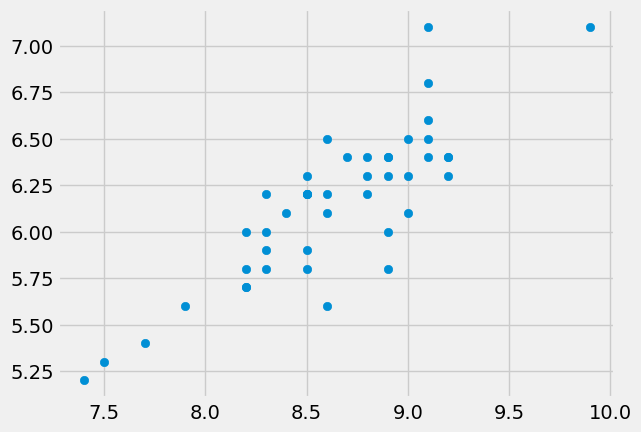

In [4]:
plt.scatter(birds["Egg Weight"], birds["Bird Weight"])
plt.show()
# Your code for part (a) above this line

In [5]:
corr_guess = 0.75

<!-- END QUESTION -->

**Question 1.2.**   

Define the following two functions:

1. `standard_units`: This function takes in an array of numbers and returns an array containing those numbers converted to standard units.
2. `correlation`: This function takes in a dataframe and two column names (one for *x* and one for *y*) and returns the correlation between these columns. 

Then calculate the correlation of the egg weight and bird weight data and assign it to the variable `correlation_bird`.



In [6]:
def standard_units(arr):
    standard_dev = np.std(arr)
    mean_ls = np.mean(arr)
    return [(x - mean_ls)/standard_dev for x in arr]

def correlation(df, x_col, y_col):
    x_su = standard_units(df[x_col])
    y_su = standard_units(df[y_col])
    data_length = len(df[x_col])
    return np.sum([x_su[i] * y_su[i] for i in range(data_length)])/data_length

correlation_bird = correlation(birds, "Egg Weight", "Bird Weight")

correlation_bird

0.8472275295101371

In [7]:
grader.check("q1_2")

q1_2 results: All test cases passed!

**Question 1.3.** Using the functions you just implemented, create a function called `fit_line`.  It should take a dataframe like `birds` and the column names associated to *x* and *y* as its arguments and return a *numpy array* containing the slope and intercept of (in that order) the least squares regression line  for the data. (You can use the formulas for the slope and intercepts that we derived in class).


In [8]:
def fit_line(df, x_col, y_col):
    correlation_xy = correlation(df, x_col, y_col)
    slope = correlation_xy * (np.std(df[y_col])/np.std(df[x_col]))
    intercept = np.mean(df[y_col]) - slope * np.mean(df[x_col])
    return np.array([slope, intercept])



In [9]:
grader.check("q1_3")

q1_3 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 1.4**

**Part a).**  

 - Run `fit_line` on the `birds` table.

 - Then create a scatterplot of the birds data with an overlaid plot of the least squares linear regression line (using the output of your `fit_line` function).  

 - For credit on this problem you must use the output of your `fit_line` function to create the line yourself, to demonstrate you understand how this line is created.

 - Label your axes and create a label for the line on the plot that gives the equation of the line. 
 Tip: including the following code in your plt.plot function will add a label with the equation of the best fit line:  `label =r'$Bird = {0:.2f}Egg{1:.2f}$'.format(slope, intercept)`


**Part b).**  Based on the slope from your least squares regression line model, we see there is a positive linear association in this sample of data between Snowy Plover egg weight and bird weight.  Can we conclude from this that there is also a positive linear association between egg weight and bird weight in the population of Snowy Plover birds?  Why or why not?  Explain your reasoning.  


## Part b Answer:
Assuming that the slope is $m$, we cannot say that an increase in $1$ gram weight of the egg will increase in $m$ grams in bird weight. We can say that if the difference between the egg weights between two Snow Plover birds was 1 gram, then their weight difference is going to be $m$ grams. Also, the data that we have is a sample, thus we cannot make any conclusion about the population unless we do something like a bootsrap where we might have a confidence level to establish our final reasoning. Thus, we cannot conclude that there is a positive linear association in the population until we have that confidence interval. 

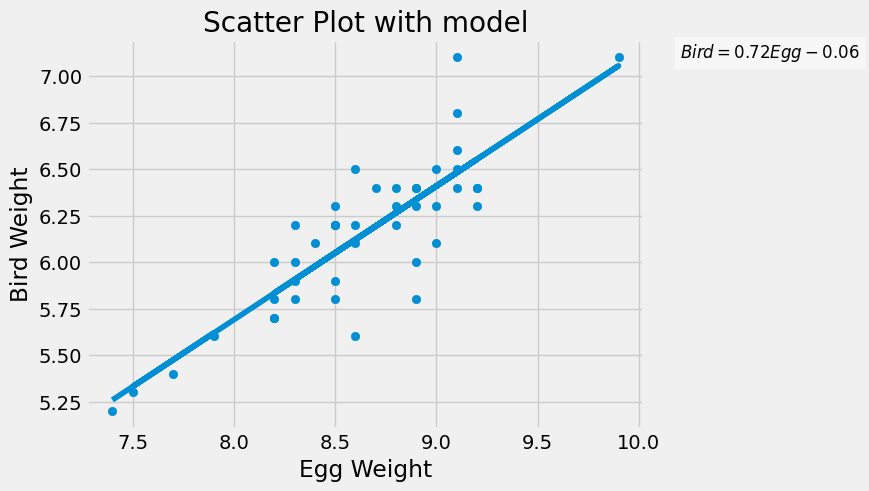

In [10]:
slope = fit_line(birds, "Egg Weight", "Bird Weight")[0]
intercept = fit_line(birds, "Egg Weight", "Bird Weight")[1]
fit_line_xy = np.array(birds["Egg Weight"]) * slope + intercept
plt.scatter(birds["Egg Weight"], birds["Bird Weight"])
plt.plot(birds["Egg Weight"], fit_line_xy)
label =r'$Bird = {0:.2f}Egg{1:.2f}$'.format(slope, intercept)
plt.text(max(birds["Egg Weight"]) * 1.12, max(birds["Bird Weight"]) * 1, label, fontsize=12, bbox=dict(facecolor='white', alpha=0.5), horizontalalignment='right')
plt.xlabel("Egg Weight")
plt.ylabel("Bird Weight")
plt.title("Scatter Plot with model")
plt.show()
# Your code for part a above this line

<!-- END QUESTION -->


## Regression Inference

Previously in this class, we've used confidence intervals to quantify uncertainty about estimates. We can also run hypothesis tests using a confidence interval under the following procedure:

1. Define a null and alternative hypothesis (they must be of the form "The parameter is X" and "The parameter is not X").
2. Choose a p-value cutoff, and call it $q$.
3. Construct a $(100-q)\%$ interval using bootstrap sampling (for example, if your p-value cutoff is 0.01, or 1%, then construct a 99% confidence interval).
4. Using the confidence interval, determine if your data are more consistent with your null or alternative hypothesis:
   * If the null hypothesis parameter X is in your confidence interval, the data are more consistent with the null hypothesis.
   * If the null hypothesis parameter X is *not* in your confidence interval, the data are more consistent with the alternative hypothesis.

More recently, we've discussed the use of linear regression to make predictions based on correlated variables. For example, we can predict the height of children based on the heights of their parents.

We can combine these two topics to make powerful statements about our population by using the following techniques:

- Bootstrapped interval for the true slope
- Bootstrapped prediction interval for y (given a particular value of x)

Questions 2 explores these two methods.



## Question 2:  Finding the Bootstrap Confidence Interval for the True Slope

Looking at the scatter plot of our sample from Question 1, we observe a linear relationship between egg weight and bird weight. However, relationships that appear in a sample might not exist in the population from which the sample was taken.

We want to know if there truly exists a linear relationship between egg weight and bird weight in the population of Snowy Plovers. If there is no linear relationship between the two variables, then we'd expect a correlation of 0. Consequently, the slope of the regression line would also be 0. 

**Question 2.1.** Let's run a hypothesis test using confidence intervals to see if there is a linear relationship between egg weight and bird weight.   Which of the following statements below are the correct null and alternative hypotheses to conduct this test?  

Assign `null_hypothesis_number` to the **number** next to the statement below that correctly describes the null hypothesis. 

Similarly, assign `alternative_hypothesis_number` to the **number** next to the statement below that correctly describes the alternative hypothesis. 

(For example, if you believe statement 1 is the correct null hypothesis, set `null_hypothesis_number` = 1 in the code cell below).  Note that the check below just checks that your answer is in the correct form, it doesn't check if you have the correct answer (that will be done when you submit to Gradescope).


 1. The true slope of the regression line that predicts bird weight from egg weight, computed using the **population** of all Snowy Plovers, is 0.72.   Any difference in the slope of the regression line computed from our sample is just a result of chance.
 
 2. The slope of the regression line that predicts bird weight from egg weight, computed using our **sample** of Snowy Plovers is 0.   
 
 3. The slope of the regression line that predicts bird weight from egg weight, computed using our **sample** of Snowy Plovers is 0.72. 

 4. The true slope of the regression line that predicts bird weight from egg weight, computed using the **population** of all Snowy Plovers, is 0.   Any difference in the slope of the regression line computed from our sample is just a result of chance.

 5. The slope of the regression line that predicts bird weight from egg weight, computed using our **sample** from Snowy Plovers, is not equal to zero.  

 6. The true slope of the regression line that predicts bird weight from egg weight, computed using the **population** of all Snowy Plovers, is not equal to zero.  
 
 7. The true slope of the regression line that predicts bird weight from egg weight, computed using the **population** of all Snowy Plovers, is not equal to 0.71.  
 
 

In [11]:
null_hypothesis_number = 2

alternative_hypothesis_number = 3

In [12]:
grader.check("q2_1")

q2_1 results: All test cases passed!

Now we have all the tools we need to create a confidence interval that quantifies our uncertainty about the true relationship between egg weight and bird weight.

<!-- BEGIN QUESTION -->

**Question 2.2.** 

a).  Create a *numpy array* called `resampled_slopes` that contains the slope of the best fit line for 10,000 bootstrap resamples of `birds`.   (Hint, use your function `fit_line` from question 1). 

b).  Then create a $95\%$ Confidence Interval for the true value of the slopes and assign the lower and upper values to the variables `CI_lower` and `CI_upper` respectively.  

c).  Create a plot with a histogram of the density distribution of these slopes AND the confidence interval overlaid on the bottom of the distribution (similar to histograms you made in HW 10).   




95% confidence interval for slope: [0.607523, 0.820675]


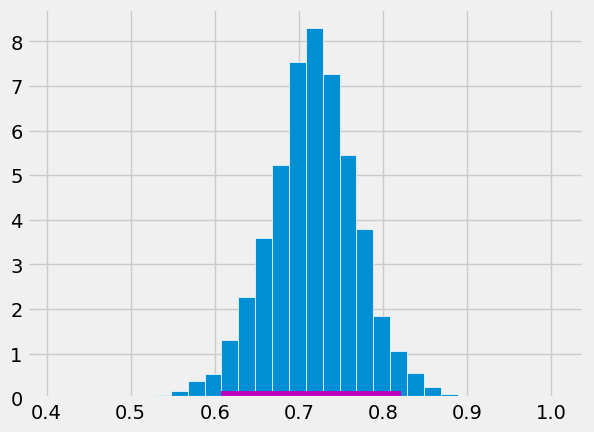

In [13]:
def bootstrapping (df):
    sample = df.sample(frac = 1, replace=True)
    return sample
resampled_slopes = np.array([fit_line(bootstrapping(birds), "Egg Weight", "Bird Weight")[0] for _ in range(10000)])
# your code for part (a) above

CI_lower = np.percentile(resampled_slopes, [2.5, 97.5])[0]
CI_upper = np.percentile(resampled_slopes, [2.5, 97.5])[1]

print("95% confidence interval for slope: [{:g}, {:g}]".format(CI_lower, CI_upper)) 


plt.hist(resampled_slopes, density=True, bins=30, edgecolor = "white")
plt.plot(np.array([CI_lower, CI_upper]), np.array([0, 0]), c='m', lw=10)
plt.show()
# your code for part (c) above

In [14]:
grader.check("q2_2")

q2_2 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2.3.** Based on your confidence interval, would you accept or reject the null hypothesis that the true slope is 0?  Explain your reasoning.  What p-value cutoff are you using? 

Reject the null hypothesis and accept the alternative because the confidence interval is [0.60535, 0.821752] with 95% confidence. The p-value I'm using is 5% percent. 

<!-- END QUESTION -->

## Finding the Bootstrap Prediction Interval

Suppose we're visiting Point Reyes and stumble upon some Snowy Plover eggs; we'd like to know how heavy they'll be once they hatch. In other words, we want to use our regression line to make predictions about a bird's weight based on the weight of the corresponding egg.

However, just as we're uncertain about the slope of the true regression line, we're also uncertain about the predictions made based on the true regression line.

**Question 2.4.** Define the function `fitted_value`.  It should take in four arguments:

1. `df`: a dataframe like `birds`.  We'll be predicting the values in the second column using the first.
2. `x_col`: the name of our x-column within the input `table`
3. `y_col`: the name of our y-column within the input `table`
2. `given_x`: a number, the value of the predictor variable for which we'd like to make a prediction.
  
The function should return the line’s prediction for the given x. 

*Hint:* Make sure to use the `fit_line` function you defined in Question 1.


In [15]:
def fitted_value(df, x_col, y_col, given_x):
    line = fit_line(df, x_col, y_col)
    slope = line[0]
    intercept = line[1]
    return (slope * given_x) + intercept

# Here's an example of how fitted_value is used. The code below
# computes the prediction for the bird weight, in grams, based on
# an egg weight of 6 grams.
egg_weight_six = fitted_value(birds, "Egg Weight", "Bird Weight", 6)
egg_weight_six

4.252819807427787

In [16]:
grader.check("q2_4")

q2_4 results: All test cases passed!

**Question 2.5.** Raymond, the resident Snowy Plover expert at Point Reyes, tells us that the egg he has been carefully observing has a weight of 8 grams. Using `fitted_value` above, assign the variable `experts_egg` to the predicted bird weight for Raymond's egg. 


In [17]:
experts_egg = fitted_value(birds, "Egg Weight", "Bird Weight", 8)
experts_egg

5.689850497215146

In [18]:
grader.check("q2_5")

q2_5 results: All test cases passed!

In [19]:
# Let's look at the number of rows in the birds table.
len(birds)

44

A fellow parkgoer raises the following objection to your prediction:

> "Your prediction depends on your sample of 44 birds.  Wouldn't your prediction change if you had a different sample of 44 birds?"

Having read section [16.3](https://inferentialthinking.com/chapters/16/3/Prediction_Intervals.html) of the textbook, you know just the response! Had the sample been different, the regression line would have been different too. This would ultimately result in a different prediction. To see how good our prediction is, we must get a sense of how variable the prediction can be.

**Question 2.6.** Define a function `compute_resampled_line` that takes in a dataframe `df`and two column names, `x_col` and `y_col`, and returns an array containing the parameters of the best fit line (slope and intercept) for one bootstrapped resample of the table.


In [20]:
def compute_resampled_line(df, x_col, y_col):
    resample = bootstrapping(df)
    resampled_line = fit_line(resample, x_col, y_col)
    return resampled_line

In [21]:
grader.check("q2_6")

q2_6 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 2.7**
Define the function `bootstrap_lines`.  It takes in four arguments:
1. `df`: a dataframe like `birds`
2. `x_col`: the name of our x-column within the input `tbl`
3. `y_col`: the name of our y-column within the input `tbl`
4. `num_bootstraps`: an integer, a number of bootstraps to run.

It returns a *dataframe* with one row for each bootstrap resample and the following two columns:
1. `Slope`: the bootstrapped slopes 
2. `Intercept`: the corresponding bootstrapped intercepts 

(Hint, use your function from the previous part of this question)

Then call this function 10,000 times using the bird data.


In [22]:
def bootstrap_lines(df, x_col, y_col, num_bootstraps):
    bootstrapped_df = pd.DataFrame({'Slope': [], 'Intercept': []})
    for _ in range(num_bootstraps):
        line = compute_resampled_line(df, x_col, y_col)
        bootstrapped_df.loc[len(bootstrapped_df.index)] = line
    return bootstrapped_df

regression_lines = bootstrap_lines(birds, "Egg Weight", "Bird Weight", 10000)
regression_lines.head()

,Slope,Intercept
0,0.730301,-0.193024
1,0.795006,-0.689385
2,0.697291,0.100338
3,0.728826,-0.179460
4,0.720929,-0.085510


In [23]:
regression_lines["Slope"][0]

0.7303007232584696

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2.8.** 

a).  Create a *numpy array* called `predictions_for_eight` that contains the predicted bird weights based on an egg of weight 8 grams for each regression line in `regression_lines` (from Question 2.7). 

b).  Then create a $95\%$ Confidence Interval for the true value of the prediction for a weight of 8 grams and assign the lower and upper values to the variables `CI_lower_pred` and `CI_upper_pred` respectively.  

c).  Create a plot with a histogram of the density distribution of these predictions AND the confidence interval overlaid on the bottom of the distribution.   Label your axes on the plot.




95% confidence interval for slope: [5.62596, 5.76972]


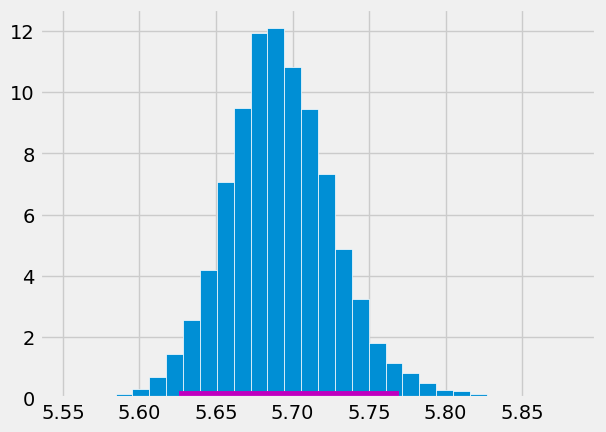

In [24]:
predictions_for_eight = np.array([(regression_lines["Slope"][i] * 8 + regression_lines["Intercept"][i]) for i in range(10000)])
# your code for part (a) above

CI_lower_pred = np.percentile(predictions_for_eight, [2.5,97.5])[0]
CI_upper_pred = np.percentile(predictions_for_eight, [2.5,97.5])[1]

print("95% confidence interval for slope: [{:g}, {:g}]".format(CI_lower_pred, CI_upper_pred)) 


plt.hist(predictions_for_eight, density=True, bins=30, edgecolor = "white")
plt.plot(np.array([CI_lower_pred, CI_upper_pred]), np.array([0, 0]), c='m', lw=10)
plt.show()
# your code for part (c) above



In [25]:
grader.check("q2_8")

q2_8 results: All test cases passed!

<!-- END QUESTION -->

**Question 2.9.** Set `plover_statements` to a list of integer(s) that correspond to all the statement(s) that are true.

1. The 95% confidence interval we found in the previous part covers 95% of the bird weights for eggs that had a weight of eight grams in `birds`.

2. The 95% confidence interval we found in the previous part gives a sense of how much actual weights differ from your prediction.

3. The 95% confidence interval we found in the previous part quantifies the uncertainty in our estimate of what the true line would predict.


In [26]:
plover_statements = [2,3]

In [27]:
grader.check("q2_9")

q2_9 results: All test cases passed!

**Seaborn For Visualizing Least Squares Regression Models and Prediction Intervals:**

In the last question we calculated the prediction interval for one input value (x=8).  We could repeat the process for every x value, and get a "prediction band".  


`seaborn` has a built-in function `lmplot` that allows us to visualize this prediction band as well as the linear regression model for a given dataset using one line of code:  https://seaborn.pydata.org/generated/seaborn.lmplot.html

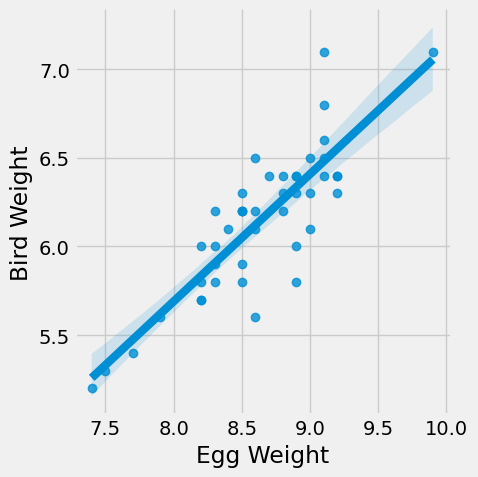

In [28]:
# Run this code.  
sns.lmplot(data=birds,x="Egg Weight",y= "Bird Weight")

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Question 3:

In this question, you will predict fuel efficiency (`mpg`) of several models of automobiles using a **single feature**: engine power (`horsepower`). 

First, let's load in the data.

In [29]:
# Here, we load the fuel dataset, and drop any rows that have missing data.
vehicle_data = sns.load_dataset('mpg').dropna()
vehicle_data = vehicle_data.sort_values('horsepower', ascending=True)
vehicle_data[vehicle_data["horsepower"]==150]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
292,18.5,8,360.0,150.0,3940,13.0,79,usa,chrysler lebaron town @ country (sw)
93,14.0,8,318.0,150.0,4237,14.5,73,usa,plymouth fury gran sedan
12,15.0,8,400.0,150.0,3761,9.5,70,usa,chevrolet monte carlo
89,15.0,8,318.0,150.0,3777,12.5,73,usa,dodge coronet custom
64,15.0,8,318.0,150.0,4135,13.5,72,usa,plymouth fury iii
215,13.0,8,318.0,150.0,3755,14.0,76,usa,dodge d100
208,13.0,8,318.0,150.0,3940,13.2,76,usa,plymouth volare premier v8
86,14.0,8,304.0,150.0,3672,11.5,73,usa,amc matador
91,13.0,8,400.0,150.0,4464,12.0,73,usa,chevrolet caprice classic
66,17.0,8,304.0,150.0,3672,11.5,72,usa,amc ambassador sst


In [30]:
vehicle_data.shape

(392, 9)

We have 392 datapoints and 8 potential features (plus our observed $y$ values, `mpg`).

<!-- BEGIN QUESTION -->

**Question 3.1.** 
We'll start by building a simple linear regression model to try and predict `mpg` using `horsepower`.  

a).  Use your function `fit_line` from question to fit this linear model (i.e. find the slope and intercept for the least squares regression line).  


b).  Then use seaborn `lmplot` to plot a scatterplot of horsepower (on the x-axis) vs mpg (on the y-axis) with the least squares linear regression line and prediction intervals included on the plot.

Our model slope is  -0.15784473335365362 and the intercept is 39.93586102117047


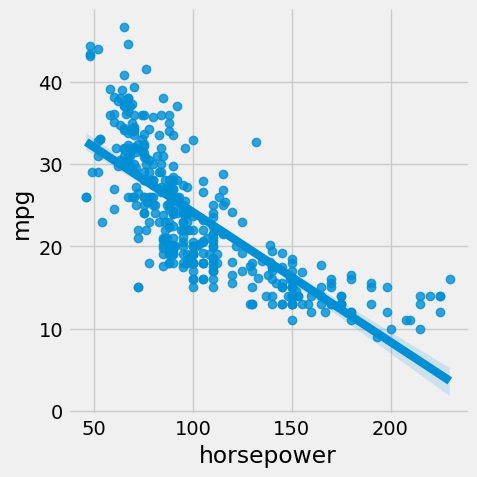

In [31]:

slope, intercept = fit_line(vehicle_data, "horsepower", "mpg")

print("Our model slope is ", slope, "and the intercept is", intercept)


sns.lmplot(data=vehicle_data, x="horsepower", y="mpg")
# Your code for part b above this line

<!-- END QUESTION -->

## `sklearn`

While writing code to fit simple linear regression models by hand (like you did in Questions 1 and 2) is not complicated, this process will become much more complex as we increase the number of features in our models.  We now introduce a built-in library in Python that we will use to build and fit more complex models.

`sklearn` is a popular Python library for building and fitting models. Below we walk through the general workflow for writing code for `sklearn`. We'll start by using it to get the best fit regression model for horsepower vs mpg (i.e. the line you plotted above), so you can see how it works with an example you've already coded by hand.  

Note that while our examples will be focused on linear models, `sklearn` is highly adaptable for use on other (more complex) kinds of models. 

There are three steps to creating and using a model in `sklearn`. 

**(1) Initialize an instance of the model class**

`sklearn` stores "templates" of useful models for machine learning. We begin the modeling process by making a "copy" of one of these templates for our own use. Model initialization looks like `ModelClass()`, where `ModelClass` is the type of model we wish to create.

For now, let's create a linear regression model using `LinearRegression()`. 

In [32]:
# Run the cell below
import sklearn.linear_model as lm

my_model = lm.LinearRegression()

my_model

LinearRegression()

`my_model` is now an instance of the `LinearRegression` class. You can think of it as the "idea" of a linear regression model. We haven't trained it yet, so it doesn't know any model parameters and cannot be used to make predictions. In fact, we haven't even told it what data to use for modeling! It simply waits for further instructions.

**(2) Train the model using `.fit`**

Before the model can make predictions, we will need to fit it to our training data. When we fit the model, `sklearn` will do the math behind the scenes minimize the MSE and determine the optimal model parameters. It will then save these model parameters to our model instance for future use. 

All `sklearn` model classes include a `.fit` method. This function is used to fit the model. It takes in two inputs: the design matrix, `X`, and the target variable, `y`. 

Let's start by fitting a model with just one feature: the `horsepower`. 

We create a design matrix `X` by pulling out the `"horsepower"` column from the DataFrame. 

Notice that we use **double brackets** to extract this column. Why double brackets instead of just single brackets? The `.fit` method, by default, expects to receive **2-dimensional** data – some kind of data that includes both rows and columns. Writing `vehicle_data["horsepower"]` would return a 1D `Series`, causing `sklearn` to error. We avoid this by writing `vehicle_data[["horsepower"]]` to produce a 2D DataFrame. 

In [33]:
# .fit expects a 2D data design matrix, so we use double brackets to extract a DataFrame
X = vehicle_data[["horsepower"]]
y = vehicle_data["mpg"]

my_model.fit(X, y)

LinearRegression()

And in just three lines of code, our model has determined the optimal model parameters! Our single-feature model takes the form:

$$\text{mpg} = \theta_0 + \theta_1 \text{horsepower}$$

Note that `LinearRegression` will automatically include an intercept term. 

The fitted model parameters are stored as attributes of the model instance. `my_model.intercept_` will return the value of $\hat{\theta}_0$ as a scalar. `my_model.coef_` will return all values $\hat{\theta}_1, 
\hat{\theta}_1, ...$ in an array. Because our model only contains one feature, we see just the value of $\hat{\theta}_1$ in the cell below.

**Notice how these exactly match the slope and intercept you found in 3.1 using your own fit_line function!**

In [34]:
# The intercept term, theta_0
intercept_model1=my_model.intercept_
intercept_model1

39.93586102117049

In [35]:
# All parameters theta_1, ..., theta_p.  
#If we want to pick out the slope, we need to select the first entry in this list
slope_model1=my_model.coef_[0]
slope_model1

-0.15784473335365382

**(3) Use the fitted model to make predictions**

Now that the model has been trained, we can use it to make predictions! To do so, we use the `.predict` method. `.predict` takes in one argument, the design matrix that should be used to generate predictions. To understand how the model performs on the training set, we would pass in the training data. Alternatively, to make predictions on unseen data, we would pass in a new dataset that wasn't used to train the model.

Below, we call `.predict` to generate model predictions on the original training data. As before, we use double brackets to ensure that we extract 2-dimensional data.

In [36]:
predicted_mpg = my_model.predict(vehicle_data[["horsepower"]])


**Question 3.2.**

Now we analyze the fit of our model.  

Start by calculating the Root Mean Squared Error (RMSE) for this model.    (Hint: this can be done in one line using predicted_mpg and the appropriate information from the original dataset). 


In [37]:
temp = vehicle_data.reset_index()
RMSE = np.sqrt(np.sum([(temp["mpg"][i] - predicted_mpg[i])**2 for i in range(len(temp["mpg"]))])/len(temp["mpg"]))

print("The RMSE of this model is ", RMSE)

The RMSE of this model is  4.893226230065713


In [38]:
grader.check("q3_2")

q3_2 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 3.3.** 
 One way we check model goodness of fit is to analyze the residuals.

For each of the (horsepower, mpg) data points given below, calculate the residual.  Give your answer as a **float value**.

Hint: You can use `my_model.predict()`   https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict 

Note that the input and the output of this method are numpy arrays, and the test below requires a single float as your answer.  


Data point A: (52, 44)

Data point B: (150, 11)


In [39]:
vehicle_data[(vehicle_data["horsepower"] == 52) & (vehicle_data["mpg"] == 44)].index

Index([394], dtype='int64')

In [40]:

res_A = 44 - predicted_mpg[temp[(temp["horsepower"] == 52) & (temp["mpg"] == 44)].index[0]] 

res_B = 11 - predicted_mpg[temp[(temp["horsepower"] == 150) & (temp["mpg"] == 11)].index[0]] 

print(res_A)
print(res_B)

12.272065113219512
-5.259151018122417


In [41]:
grader.check("q3_3")

q3_3 results: All test cases passed!

<!-- END QUESTION -->

Next, we **plot the residuals.** 

When we make a residual plot, we'll put the residuals on the y-axis.  But we have an option of what to use for the x-axis:  either the single input feature (in this case `horsepower` OR the fitted y-values (i.e. the predicted y output of the model).  When we have more than one feature i.e. in Multiple Linear Regression, we usually just plot the residuals vs the fitted y-values.  


For reference we'll provide both residual plots below.  We also replot the original dataset and our SLR model.



Text(0.5, 1.0, 'Residuals vs. predicted mpg')

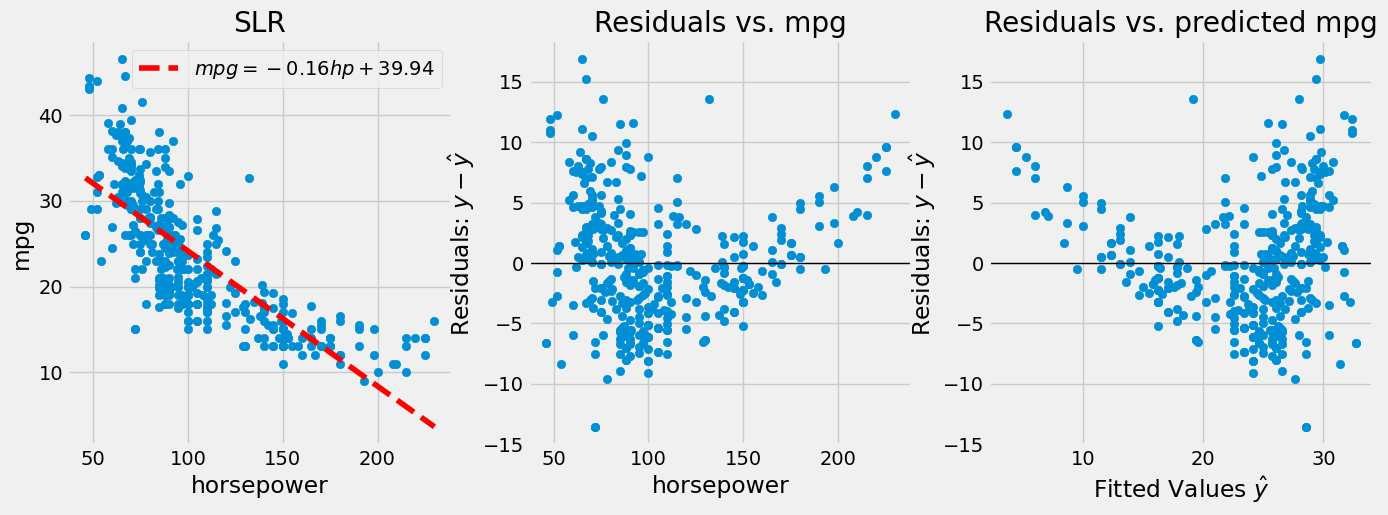

In [42]:
fig, ax = plt.subplots(1,3, figsize=(15, 5))

ax[0].scatter(vehicle_data['horsepower'], vehicle_data['mpg'])
ax[0].plot(vehicle_data['horsepower'], predicted_mpg, 'r--', label =r'$mpg = {0:.2f}hp+{1:.2f}$'.format(my_model.coef_[0],my_model.intercept_))
ax[0].set_xlabel('horsepower')
ax[0].set_ylabel('mpg')
ax[0].set_title('SLR')
ax[0].legend()


ax[1].scatter(vehicle_data['horsepower'], vehicle_data['mpg'] - predicted_mpg)
ax[1].axhline(0, c='black', linewidth=1)
ax[1].set_xlabel(r'horsepower')
ax[1].set_ylabel(r'Residuals: $y - \hat{y}$');
ax[1].set_title("Residuals vs. mpg")

ax[2].scatter(predicted_mpg, vehicle_data['mpg'] - predicted_mpg)
ax[2].axhline(0, c='black', linewidth=1)
ax[2].set_xlabel(r'Fitted Values $\hat{y}$')
ax[2].set_ylabel(r'Residuals: $y - \hat{y}$');
ax[2].set_title("Residuals vs. predicted mpg")



<!-- BEGIN QUESTION -->

**Question 3.4.**  Do these residual plots indicate that our linear model is a good model for the data? Why or why not?


These residual plots indicate that our linear model is not a good model because the residual plot has a pattern and is not scattered which indicates that the actual correct model is supposed to follow a specific pattern that our current model is not following. 

<!-- END QUESTION -->



## Question 4: Transform a Single Feature

Based on the residual plot in Question 3, our first attempt at the model is not the best fit for our data.  

Recall from lecture, the Tukey-Mosteller Bulge Diagram is a useful tool for summarizing what transformations can linearize the relationship between two variables. To determine what transformations might be appropriate, trace the shape of the “bulge” made by your data. Find the quadrant of the diagram that matches this bulge. The transformations shown on the vertical and horizontal axes of this quadrant can help improve the fit between the variables.

Note that:

 - There are multiple solutions. Some will fit better than others.
 - sqrt and log make a value “smaller.”
 - Raising to a power makes a value “bigger.”
 - Each of these transformations equates to increasing or decreasing the scale of an axis.

<img src="Tukey.jpeg" alt="Tukey-Mosteller" width="500">



**Question 4.1**

Based on the scatterplot of the `horsepower` vs `mpg` data, which of the following are possible data transformations we could try?  Set `tukey` to $\textit{a list of integer(s)}$ that correspond to all the possible applicable transformations.

1. Use $\sqrt{horsepower}$

2. Use $\log({horsepower})$

3. Use $(horsepower)^2$

4. Use $(horsepower)^3$

5. Use $\sqrt{mpg}$

6. Use $\log({mpg})$

7. Use $(mpg)^2$

8. Use $(mpg)^3$


In [43]:
tukey = [1,2,5,6]

In [44]:
grader.check("q4_1")

q4_1 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 4.2**

Let's start by trying Option 1 in the list above.  

a).  Add a new column to vehicle_data called `sqrt(hp)` that contains the square root of the horsepower data.  


b).  Then plot a scatterplot of `mpg` vs `sqrt(hp)` to visually inspect if this transformation makes the data appear more linear than our first model.  Label your axes.



In [45]:
vehicle_data["sqrt(hp)"] = (vehicle_data["horsepower"])**0.5
# your code for part(a) above


vehicle_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,sqrt(hp)
19,26.0,4,97.0,46.0,1835,20.5,70,europe,volkswagen 1131 deluxe sedan,6.782330
102,26.0,4,97.0,46.0,1950,21.0,73,europe,volkswagen super beetle,6.782330
326,43.4,4,90.0,48.0,2335,23.7,80,europe,vw dasher (diesel),6.928203
325,44.3,4,90.0,48.0,2085,21.7,80,europe,vw rabbit c (diesel),6.928203
244,43.1,4,90.0,48.0,1985,21.5,78,europe,volkswagen rabbit custom diesel,6.928203


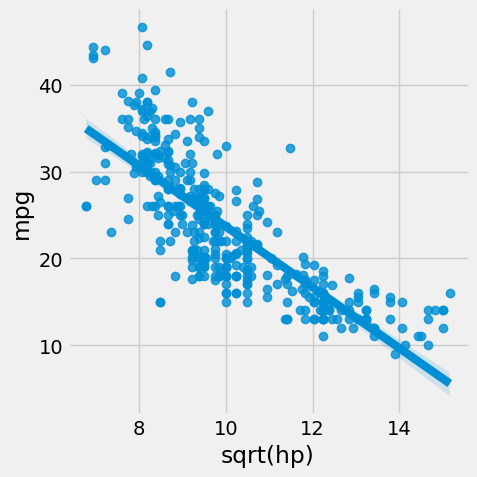

In [50]:
sns.lmplot(data=vehicle_data, x="sqrt(hp)", y="mpg")
# your code for part(b) above


In [51]:
grader.check("q4_2")

q4_2 results: All test cases passed!

<!-- END QUESTION -->

**Question 4.3.** 

Let's try fitting this adjusted model:


$$\text{predicted_mpg_hp_sqrt} = \theta_0 + \theta_1 \sqrt{\text{horsepower}}$$



<!-- BEGIN QUESTION -->

In the cell below, explain why we use the term "linear" to describe the model above, even though it incorporates a square root function as a feature.

It's linear beacuse the new transformation is already transformed so that it looks more like a linear than a non-transformed model which means that after looking at the new transformed scatterplot, we have to create a new model for that scatterplot which should look linear using the new transformed data.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 4.4.**  

a).  Use `sklearn` to create and fit this new model.  

b.   Once you've created the new model, set `predicted_mpg_hp_sqrt` to the predicted mpg for the data.

c).  Make 2 side-by-side plots:  
 - A plot of this new model overlaid with a scatterplot of the original data.  Include the equation for the new model as a label on your plot (see the plots in question 3 for reference on how to code this).
 - A plot of the residuals vs the **predicted values of mpg**

d).  Calculate the RMSE for this model

In [58]:
adjusted_model = lm.LinearRegression()
X_adjusted = vehicle_data[["sqrt(hp)"]]
y = vehicle_data["mpg"]

adjusted_model.fit(X_adjusted, y)

predicted_mpg_hp_sqrt = adjusted_model.predict(vehicle_data[["sqrt(hp)"]])
# Your code for parts a) and b) above this line

Text(0.5, 1.0, 'Residuals vs. predicted mpg')

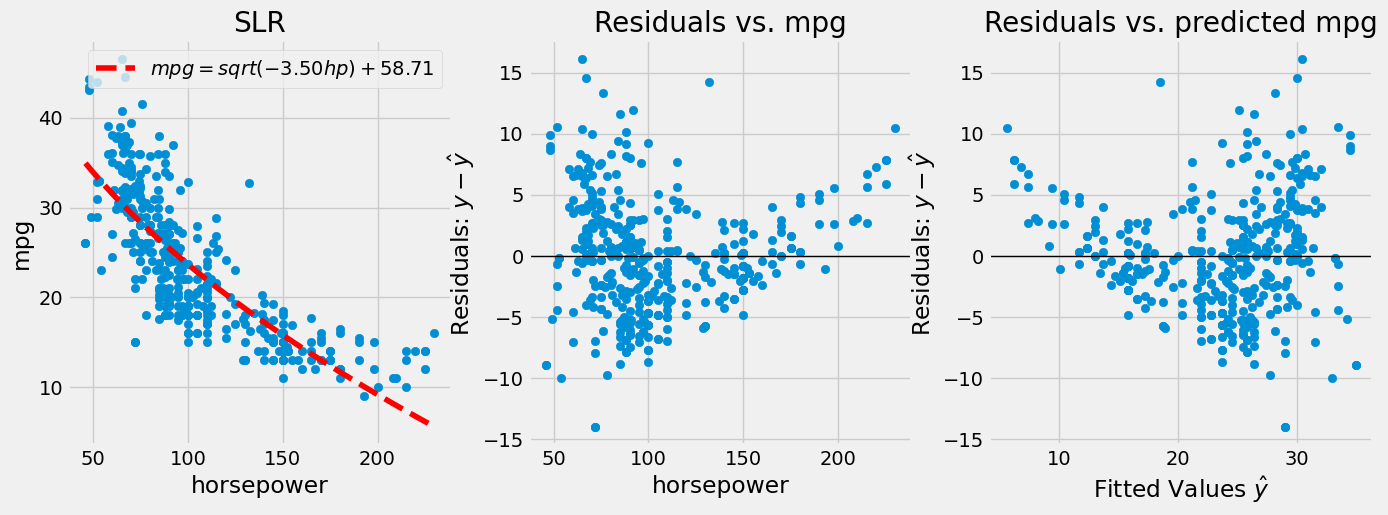

In [93]:
fig, ax = plt.subplots(1,3, figsize=(15, 5))
ax[0].scatter(vehicle_data['horsepower'], vehicle_data['mpg'])
ax[0].plot(vehicle_data['horsepower'], predicted_mpg_hp_sqrt, 'r--', label =r'$mpg = sqrt({0:.2f}hp)+{1:.2f}$'.format(adjusted_model.coef_[0],adjusted_model.intercept_))
ax[0].set_xlabel('horsepower')
ax[0].set_ylabel('mpg')
ax[0].set_title('SLR')
ax[0].legend()


ax[1].scatter(vehicle_data['horsepower'], vehicle_data['mpg'] - predicted_mpg_hp_sqrt)
ax[1].axhline(0, c='black', linewidth=1)
ax[1].set_xlabel(r'horsepower')
ax[1].set_ylabel(r'Residuals: $y - \hat{y}$');
ax[1].set_title("Residuals vs. mpg")

ax[2].scatter(predicted_mpg_hp_sqrt, vehicle_data['mpg'] - predicted_mpg_hp_sqrt)
ax[2].axhline(0, c='black', linewidth=1)
ax[2].set_xlabel(r'Fitted Values $\hat{y}$')
ax[2].set_ylabel(r'Residuals: $y - \hat{y}$');
ax[2].set_title("Residuals vs. predicted mpg")
# Your code for part c  above this line


In [66]:
RMSE_hp_sqrt = np.sqrt(np.sum([(temp["mpg"][i] - predicted_mpg_hp_sqrt[i])**2 for i in range(len(temp["mpg"]))])/len(temp["mpg"]))

print("The RMSE of this model is ", RMSE_hp_sqrt)

The RMSE of this model is  4.652907260805868


In [67]:
grader.check("q4_4")

q4_4 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 4.5.** 
Analyze the new model compared to the original one.  Which RMSE is smaller?  Does the residual plot of this new model indicate this model is a good choice?  Why or why not?

The new model is smaller. The residual plot of this new model still does not look good because it is still showing a patter and it is not truly scattered. 

<!-- END QUESTION -->

**Question 4.6.**   

Based on the Tukey-Mosteller Bulge Diagram and since there are still some patterns in our residuals, we could try to further linearize the data by taking the log of the y-values.


Let's try fitting this adjusted model:


$$\text{log(mpg)} = \theta_0 + \theta_1 \sqrt{\text{horsepower}}$$


<!-- BEGIN QUESTION -->

a).  Add a new column to vehicle_data called `log(mpg)` that contains the log of the **mpg** data.  


b).  Then plot a scatterplot of `log(mpg)` vs `sqrt(hp)` to visually inspect if this transformation makes the data appear more linear than our first and second models.  Label your axes.




In [69]:
vehicle_data["log(mpg)"] = np.log(vehicle_data["mpg"])

<!-- END QUESTION -->

**Question 4.7.**  

a).  Use `sklearn` to create and fit this new model.  

b).  Since the model will output predicted values in units of log(mp), you will need to transform it back to compare to our original data.

Notice:

$$\text{log(mpg)} = \theta_0 + \theta_1 \sqrt{\text{horsepower}}$$

$$ \implies mpg = e^{\theta_0 + \theta_1 \sqrt{\text{horsepower}}}$$


Let `predicted_mpg_model3` equal the output from the transformed equation: $ mpg = e^{\theta_0 + \theta_1 \sqrt{\text{horsepower}}}$


c).  Make 2 side-by-side plots:  
 - A plot of this new model overlaid with a scatterplot of the original data.  Include the equation for the new model as a label on your plot (see the plots in question 3 for reference on how to code this).
 - A plot of the residuals vs the **predicted values of mpg** (`predicted_mpg_model3`)
 
`
d).  Calculate the RMSE for this model

<!-- BEGIN QUESTION -->

Question 4.7:

In [96]:
adjusted_model_with_mpg = lm.LinearRegression()
X_adjusted = vehicle_data[["sqrt(hp)"]]
y_adjusted = vehicle_data["log(mpg)"]

adjusted_model_with_mpg.fit(X_adjusted, y_adjusted)

predicted_mpg_model3 = np.exp(adjusted_model_with_mpg.predict(vehicle_data[["sqrt(hp)"]]))
# Your code for parts a) and b) above this line

Text(0.5, 1.0, 'Residuals vs. predicted mpg')

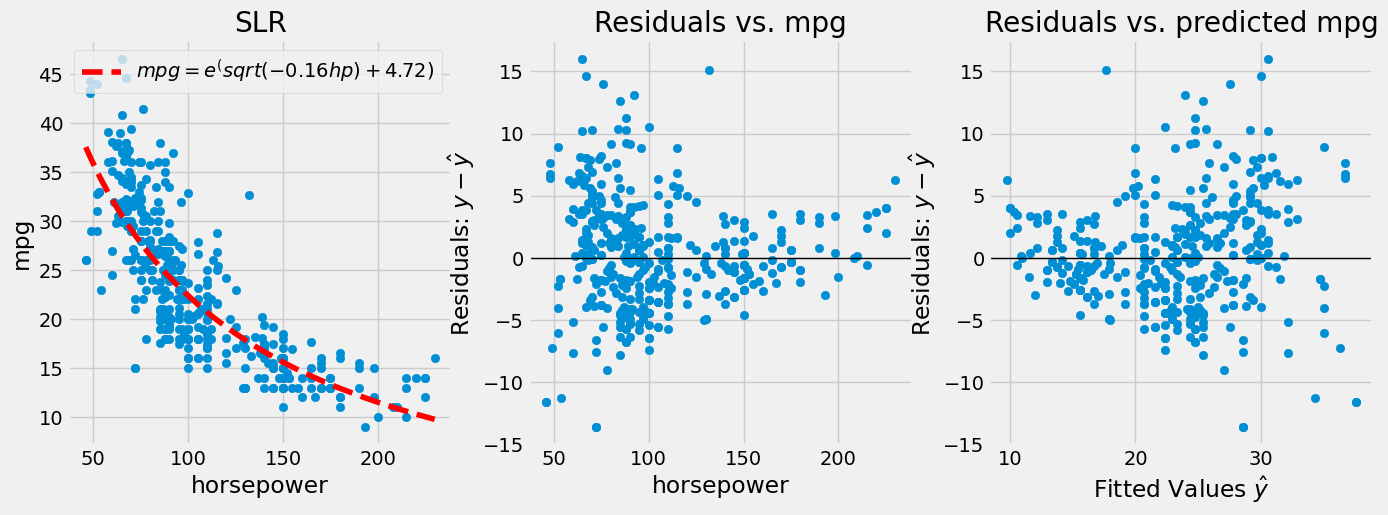

In [97]:
fig, ax = plt.subplots(1,3, figsize=(15, 5))
ax[0].scatter(vehicle_data['horsepower'], vehicle_data['mpg'])
ax[0].plot(vehicle_data['horsepower'], predicted_mpg_model3, 'r--', label =r'$mpg = e^(sqrt({0:.2f}hp)+{1:.2f}$)'.format(adjusted_model_with_mpg.coef_[0],adjusted_model_with_mpg.intercept_))
ax[0].set_xlabel('horsepower')
ax[0].set_ylabel('mpg')
ax[0].set_title('SLR')
ax[0].legend()


ax[1].scatter(vehicle_data['horsepower'], vehicle_data['mpg'] - predicted_mpg_model3)
ax[1].axhline(0, c='black', linewidth=1)
ax[1].set_xlabel(r'horsepower')
ax[1].set_ylabel(r'Residuals: $y - \hat{y}$');
ax[1].set_title("Residuals vs. mpg")

ax[2].scatter(predicted_mpg_model3, vehicle_data['mpg'] - predicted_mpg_model3)
ax[2].axhline(0, c='black', linewidth=1)
ax[2].set_xlabel(r'Fitted Values $\hat{y}$')
ax[2].set_ylabel(r'Residuals: $y - \hat{y}$');
ax[2].set_title("Residuals vs. predicted mpg")

# Your code for part c  above this line


In [98]:
RMSE_model3 = RMSE_hp_sqrt = np.sqrt(np.sum([(temp["mpg"][i] - predicted_mpg_model3[i])**2 for i in range(len(temp["mpg"]))])/len(temp["mpg"]))

print("The RMSE of this model is ", RMSE_model3)

The RMSE of this model is  4.462359658070859


In [ ]:
grader.check("q4_7")

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 4.8.** 
Analyze this new model compared to the first 2 ones.  Which RMSE is smaller?  Does the residual plot of this new model indicate this model is a better choice than the first two?  Why or why not?

This model has the smallest RMSE and the residual plot does indicates that the new model is a better choice than the first two because the plot is more spread out than the first two with the least variance out of the two models that we had.

<!-- END QUESTION -->

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Congratulations! You have finished Homework 10!

If you discussed this assignment with any other students in the class (in a manner that is acceptable as described by the Collaboration policy above) please **include their names** here:

**Collaborators**: *list collaborators here*

### Submission Instructions

Before proceeding any further, **save this notebook.**

After running the `grader.export()` cell provided below, **2 files will be created**: a zip file and pdf file.  You can download them using the links provided below OR by finding them in the same folder where this juptyer notebook resides in your JuptyerHub.

To receive credit on this assignment, **you must submit BOTH of these files
to their respective Gradescope portals:** 

* **Homework 10 Autograded**: Submit the zip file that is output by the `grader.export()` cell below to the HW10 Autograded assignment in Gradescope.

* **Homework 10 Manually Graded**: Submit your hw10.PDF to the HW10 Manually Graded assignment in Gradescope.  **YOU MUST SELECT THE PAGES CORRESPONDING TO EACH QUESTION WHEN YOU UPLOAD TO GRADESCOPE.  IF NOT, YOU WILL LOSE POINTS**   Also, **check** that all of your plots **and** all lines of your code are showing up in your PDF before submitting.  If not, you will not receive credit for your plots/code.  


**You are responsible for ensuring your submission follows our requirements. We will not be granting regrade requests nor extensions to submissions that don't follow instructions.** If you encounter any difficulties with submission, please don't hesitate to reach out to staff prior to the deadline.

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

AFTER running the cell below, click on <a href='hw10.pdf' download>this link to download the PDF </a> to upload to Gradescope.  There will be a separate link that appears after running the cell below with a link to download the zip file to upload to Gradescope.

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)